**Market Basket Analysis - Online Retail Dataset**
(This is a continuation of Part 1 - Market Basket Analysis Technique is applied to the Online Retail dataset)

MBA is a technique used to find the relationship between items.This is mainly used in stores so that people many tend to buy more items which in turn improve the business.Since the closely associated items are arranged together.

MBA is used mainly to discover the hidden parts in the data.MBA uses Apriori algorithm. According to this algorithm, in a frequent itemset, the subsets are also frequent.It is used for association rule mining to identify correlations between the data.

There are 3 main components of apriori algorithm.These are Support,Life and Confidence.

From the cleaned dataset, I am going to use only the 3 columns that are important for MBA.

The deliverables for Unsupervised Learning project can be found below:

Video Link :

https://youtu.be/w5QH4oOOW_U

GitHub Repository:

https://github.com/kmadhu181090/MS-AI/tree/main/Pathway%20Machine%20Learning%3A%20Theory%20%26%20Hands-On%20Practice%20with%20Python%20Specialization/CSCA%205632%3A%20Unsupervised%20Algorithms%20in%20Machine%20Learning

Citation:

Seo, J. S. (2015). Online Retail Data Set from UCI ML repo. Kaggle.com. https://doi.org/10.1057/dbm.2012.17)

Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

Source:

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK

In [20]:
import os
import matplotlib.pyplot as plt


In [6]:
import pandas as pd

df_cleaned = pd.read_csv("df_cleaned.csv")
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [7]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [8]:
df_MBA = df_cleaned[['InvoiceNo','Description','Quantity','InvoiceDate']]
df_MBA.head()

,InvoiceNo,Description,Quantity,InvoiceDate
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00


In [9]:
df_MBA.shape

(397884, 4)

In [10]:
#Creating a new column transaction
df_MBA['transaction'] = df_MBA['InvoiceNo'].astype(str)+'_'+pd.to_datetime(df_MBA['InvoiceDate']).dt.date.astype(str)
#df_MBA['InvoiceDate'] = pd.to_datetime(df_MBA['InvoiceDate']).dt.date
df_MBA.tail(20)


/tmp/ipython-input-55898246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MBA['transaction'] = df_MBA['InvoiceNo'].astype(str)+'_'+pd.to_datetime(df_MBA['InvoiceDate']).dt.date.astype(str)


,InvoiceNo,Description,Quantity,InvoiceDate,transaction
397864,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,581585_2011-12-09
397865,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,581586_2011-12-09
397866,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,581586_2011-12-09
397867,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,581586_2011-12-09
397868,581586,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,581586_2011-12-09
397869,581587,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,581587_2011-12-09
397870,581587,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,581587_2011-12-09
397871,581587,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,581587_2011-12-09
397872,581587,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,581587_2011-12-09
397873,581587,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,581587_2011-12-09


In [11]:
df_MBA['Description'].value_counts()


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1723
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1396
...,...
CLASSIC DIAMANTE NECKLACE JET,1
DIAMANTE NECKLACE BLACK,1
ANT SILVER TURQUOISE BOUDICCA RING,1


In [12]:
#Create a pivot table where rows = transaction and columns = description

df_MBA_cleaned = pd.crosstab(df_MBA['transaction'],df_MBA['Description'],values=df_MBA['Quantity'],aggfunc='sum').fillna(0).astype(int)
#df_MBA_cleaned.astype(int)
df_MBA_cleaned.head(20)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
transaction,,,,,,,,,,,,,,,,,,,,,
536365_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370_2010-12-01,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0
536371_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Convert the values in the above pivot table to either 1 or 0 based on a condition

def encode(x):
  var = 0
  if x>1:
    var = 1
  return var

df_MBA_final = df_MBA_cleaned.applymap(encode)

/tmp/ipython-input-3565250071.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_MBA_final = df_MBA_cleaned.applymap(encode)


In [14]:
df_MBA_final.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
transaction,,,,,,,,,,,,,,,,,,,,,
536365_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369_2010-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Drop columns from the pivot table that are all zeros

df_MBA_final = df_MBA_final.loc[:,df_MBA_final.sum()>0]

In [16]:
len(df_MBA_final.columns)

3778

In [17]:
#Filtering only the items that are purchased >=500 times

item_counts = df_MBA_final.sum()
frequent_items = item_counts[item_counts >=500].index
df_filtered = df_MBA_final[frequent_items].astype(bool)
df_filtered.shape

(18532, 88)

In [18]:
#FP Growth algorithm - finds frequent itemsets, combination of items that appear often in many transactions
#support = number of transations containing the itemset/total number of transactions

import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import fpgrowth
from tqdm import tqdm

with tqdm(total=1,desc='Running FP Growth') as pbar:
  frequent_itemscombinations = fpgrowth(df_filtered,min_support=0.002,use_colnames=True,max_len=2)
  pbar.update(1)

Running FP Growth:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().r

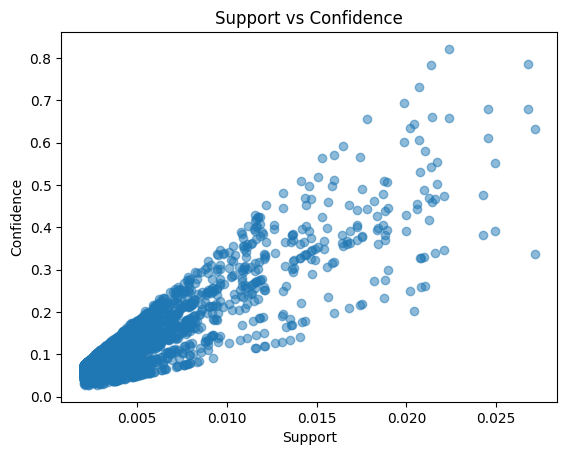

In [21]:
#Association Rules
import warnings

warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemscombinations,metric="lift",min_threshold=1)
rules_filtered = rules[(rules['support'] >= 0.002) &(rules['confidence'] >= 0.3) &(rules['lift'] >= 1.2)]
rules_filtered.sort_values('lift', ascending=False).head(10)

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

Each dot represents a rule generated from the frequent itemsets.

Support = Transactions with X and Y/Total Transactions Confidence = Transactions with X and Y/Transactions with X

Dots at the right corner indicates higher support and confidence.They appear in more baskets.

This plot is used to identify the combinations that is strongly/weakly preferred.

In [22]:
#Top 10 Item combinations

import warnings
warnings.filterwarnings("ignore")
rules['antecedent'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequent'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules_table = rules[['antecedent', 'consequent', 'support', 'confidence', 'lift', 'leverage']]
top10 = rules_table.sort_values('lift', ascending=False).head(10)
top10

,antecedent,consequent,support,confidence,lift,leverage
2763,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.022394,0.821782,24.173440,0.021467
2762,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.022394,0.658730,24.173440,0.021467
3492,GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM,0.020721,0.732824,21.454506,0.019755
3493,GARDENERS KNEELING PAD KEEP CALM,GARDENERS KNEELING PAD CUP OF TEA,0.020721,0.606635,21.454506,0.019755
2089,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX,0.019858,0.602291,21.020081,0.018913
2088,DOLLY GIRL LUNCH BOX,SPACEBOY LUNCH BOX,0.019858,0.693032,21.020081,0.018913
2203,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.026765,0.787302,19.986675,0.025425
2202,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.026765,0.679452,19.986675,0.025425
2764,ROSES REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.021368,0.542466,19.906882,0.020295
2765,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.021368,0.784158,19.906882,0.020295


Conclusion & Analysis(Market Basket Analysis):

In Market Basket Analysis, the frequent itemsets are found using fpgrowth algorithm.Their Support,Confidence and Lift values are calculated.From the above table, we can see the top 10 items combinations with their values.